# Part I - Seasonal Analysis of English Premier League (EPL) Results
## by Teye Richard Gamah


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pre">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#con">Conclusion</a></li>
</ul>




<a id='intro'></a>
## Introduction
> Data on the English Premier League Results from 1993-94 to 2021-22

- The **English Premier League** is one of the most popular domestic league in the world.
- This dataset contains **25 years** of EPL matches history with **goal details** and **results**

<a id='pre'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Loading the dataset


In [2]:
df = pd.read_csv('results.csv', encoding='windows-1252')

In [3]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


                                            Column Details

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Season                         | Premier Leage Season                                                                       | 
| DateTime                       | Match Date and Time (yyyy-mm-dd hh:mm:ss)                                                  | 
| HomeTeam                       | Team playing at the Home Ground                                                            | 
| AwayTeam                       | Team playing at the Away ground                                                            |
| FTHG                           | Full-Time Home Team Goals                                                                  |
| FTAG                           | Full-Time Away  Team Goals                                                                 |
| FTR                            | Full-Time Result (H=Home Win, D=Draw, A=Away Win)                                          |
| HTHG                           | Half-Time Home Team Goals                                                                  | 
| HTAG                           | Half-Time Away Team Goals                                                                  |
| HTR                            | Half-Time Result (H=Home Win, D=Draw, A=Away Win)                                          |
| Referee                        | Match Referee                                                                              |
| HS                             | Home Team Shots                                                                            |
| AS                             | Away Team Shots                                                                            |
| HST                            | Home Team Shots on Target                                                                  |
| AST                            | Away Team Shots on Target                                                                  |
| HC                             | Home Team Corners                                                                          |
| AC                             | Away Team Corners                                                                          |
| HF                             | Home Team Fouls Committed                                                                  |
| AF                             | Away Team Fouls Committed                                                                  |
| HY                             | Home Team Yellow Cards                                                                     |
| AY                             | Away Team Yellow Cards                                                                     |
| HR                             | Home Team Red Cards                                                                        |
| AR                             | Away Team Red Cards                                                                        |

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
Season      11113 non-null object
DateTime    11113 non-null object
HomeTeam    11113 non-null object
AwayTeam    11113 non-null object
FTHG        11113 non-null int64
FTAG        11113 non-null int64
FTR         11113 non-null object
HTHG        10189 non-null float64
HTAG        10189 non-null float64
HTR         10189 non-null object
Referee     8289 non-null object
HS          8289 non-null float64
AS          8289 non-null float64
HST         8289 non-null float64
AST         8289 non-null float64
HC          8289 non-null float64
AC          8289 non-null float64
HF          8289 non-null float64
AF          8289 non-null float64
HY          8289 non-null float64
AY          8289 non-null float64
HR          8289 non-null float64
AR          8289 non-null float64
dtypes: float64(14), int64(2), object(7)
memory usage: 2.0+ MB


In [6]:
df.isna().sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64

### What is the structure of your dataset?

> There are 23 columns and 11113 rows from the dataset

### What is/are the main feature(s) of interest in your dataset?

- Number of teams in each season
- Number of goals in each season
- Number of Wins, Draws and Loses in each season 
- Total Corners in each season and their influence on goals
- Total shots and shots on target in each season and their influence on goals
- Total fouls and cards (Yellow or Red) committed and their influence on winning

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Season - Season 
- HomeTeam - Home Team
- AwayTeam - Away Team
- FTHG - Full Time Home Team Goals
- FTAG - Full Time Away Team Goals
- FTR - Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HS - Home Team Shots
- AS - Away Team Shots
- HST - Home Team Shots on Target
- AST - Away Team Shots on Target
- HC - Home Team Corners
- AC - Away Team Corners

<a id='uni'></a>
## Univariate Exploration
>In this section, investigations into number of teams in each season, teams that have played in all season as well as Home and Away goals distribution would be made.

#### Question 1.1 How many teams played in each season?


In [7]:
total_seasonal_teams = df.groupby('Season')['HomeTeam'].nunique()

total_seasonal_teams

Season
1993-94    22
1994-95    22
1995-96    20
1996-97    20
1997-98    20
1998-99    20
1999-00    20
2000-01    20
2001-02    20
2002-03    20
2003-04    20
2004-05    20
2005-06    20
2006-07    20
2007-08    20
2008-09    20
2009-10    20
2010-11    20
2011-12    20
2012-13    20
2013-14    20
2014-15    20
2015-16    20
2016-17    20
2017-18    20
2018-19    20
2019-20    20
2020-21    20
2021-22    20
Name: HomeTeam, dtype: int64

The seasons 1993-94 and 1994-95 seem to have 22 teams while the rest have only 20 teams.

This can be visualized, as below

#### Visualization

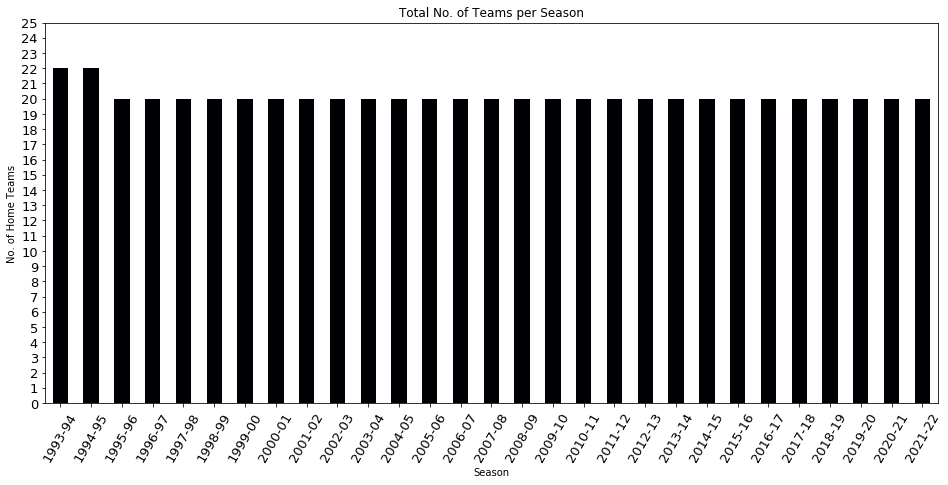

In [8]:
total_seasonal_teams.plot(kind='bar',colormap='magma',fontsize=13,figsize=(16,7),yticks=np.arange(0, 26))
plt.ylabel('No. of Home Teams')
plt.title("Total No. of Teams per Season")
plt.xticks(rotation=60);

#### Observation
The bar chart above comfirms that the 1993-94 and 1994-95 seasons have the highest number of games, 22, as compared to the rest of the seasons which have the same number of teams as 20

#### Question 1.2 How many teams have played in all the seasons?

In [9]:
# Defining Teams that played in each season

team_appearances = df.groupby(['HomeTeam'])['Season'].nunique()
team_appearances

HomeTeam
Arsenal             29
Aston Villa         26
Barnsley             1
Birmingham           7
Blackburn           17
Blackpool            1
Bolton              13
Bournemouth          5
Bradford             2
Brentford            1
Brighton             5
Burnley              8
Cardiff              2
Charlton             8
Chelsea             29
Coventry             8
Crystal Palace      12
Derby                7
Everton             29
Fulham              15
Huddersfield         2
Hull                 5
Ipswich              4
Leeds               13
Leicester           16
Liverpool           29
Man City            24
Man United          29
Middlesbrough       14
Newcastle           27
Norwich              9
Nott'm Forest        4
Oldham               1
Portsmouth           7
QPR                  6
Reading              3
Sheffield United     4
Sheffield Weds       7
Southampton         22
Stoke               10
Sunderland          16
Swansea              7
Swindon              1
To

#### Visualization

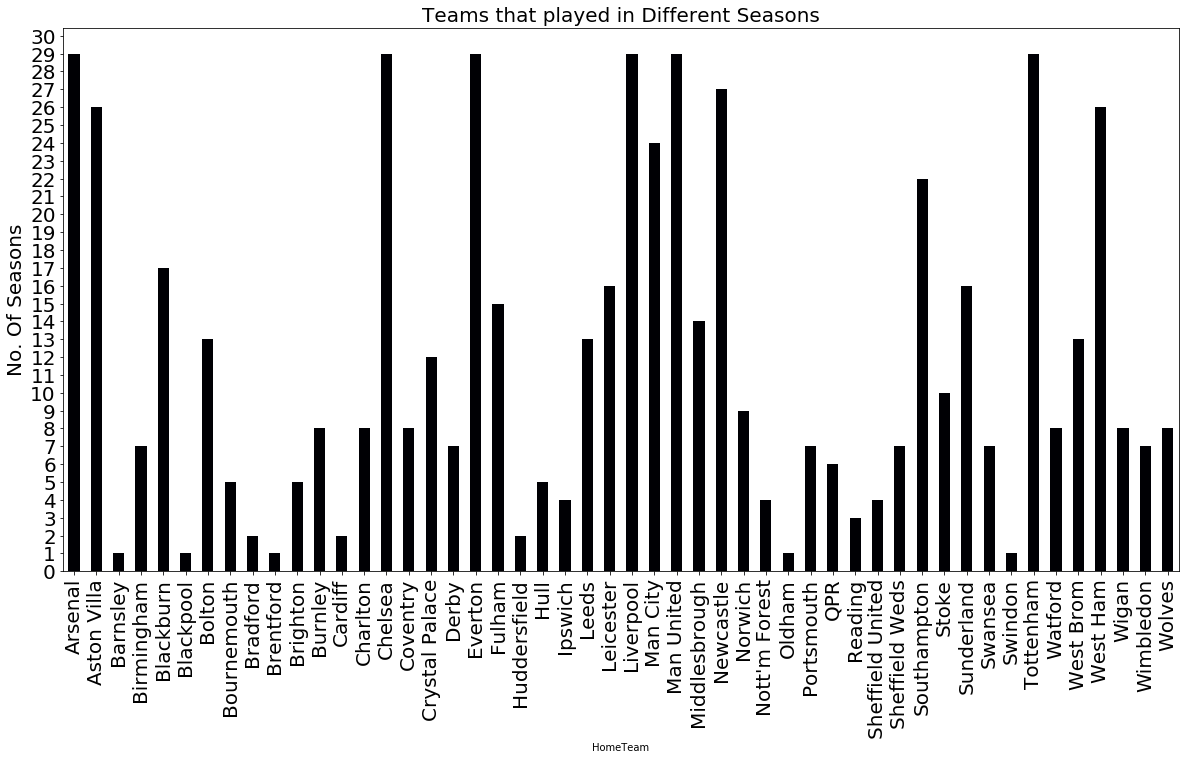

In [10]:
# Creating visualization for teams that appeared/played in all seasons
team_appearances.plot(kind='bar',figsize=(20,10), yticks=np.arange(0,31,1),
                      colormap='magma',fontsize=20)
plt.ylabel("No. Of Seasons",fontsize=20)
plt.xticks(rotation=90)
plt.title("Teams that played in Different Seasons",fontsize=20);

#### Observation
The bar chart shows that `Arsenal`, `Chelsea`, `Man United` and `Tottenham` are the teams that have played in all the 29 seasons. On the other hand, `Barnsley`, `Blackpool`, `Brentford`, `Oldham` and `Swindon` played in only one season.

#### Question 1.3 What is the ratio of Home and Away goals over the seasons?

In [11]:
#Seasonal Home/Away Goal Ratio 

goal_ratio = (round((df.groupby('Season')['FTHG'].sum()/
                     df.groupby('Season')['FTAG'].sum()),3))
goal_ratio

Season
1993-94    1.246
1994-95    1.400
1995-96    1.422
1996-97    1.360
1997-98    1.386
1998-99    1.362
1999-00    1.494
2000-01    1.449
2001-02    1.255
2002-03    1.326
2003-04    1.300
2004-05    1.407
2005-06    1.427
2006-07    1.456
2007-08    1.380
2008-09    1.298
2009-10    1.581
2010-11    1.383
2011-12    1.307
2012-13    1.257
2013-14    1.317
2014-15    1.349
2015-16    1.235
2016-17    1.328
2017-18    1.335
2018-19    1.252
2019-20    1.258
2020-21    1.008
2021-22    1.139
dtype: float64

#### Visualization

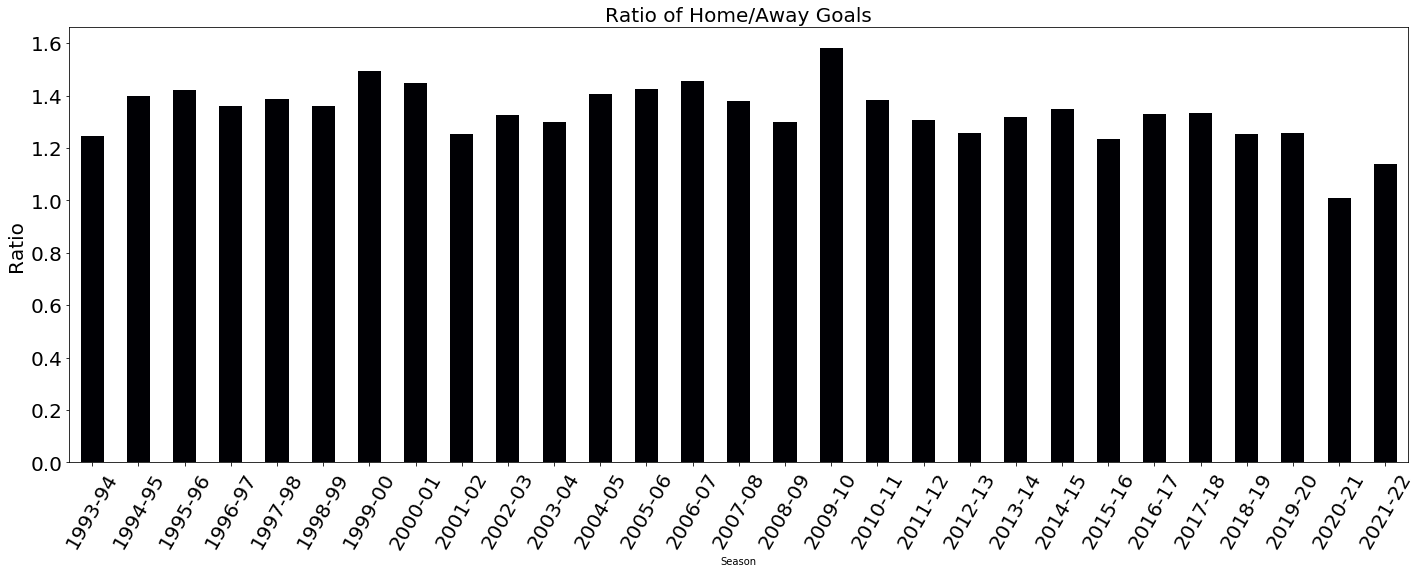

In [13]:
# Creating visualization for Seasonal Home/Away Goal Ratio 
goal_ratio.plot(kind='bar',figsize=(24,8),colormap='magma',fontsize= 20)
plt.ylabel("Ratio",fontsize= 20)
plt.title("Ratio of Home/Away Goals",fontsize= 20)
plt.xticks(rotation=60);

#### Observation
The bar chart above shows that the 2009-10 season has the highest Home/Away goal ratio while 2020-21 has the least Home/Away goal ratio.

<div class="alert alert-block alert-info">
    <b>For the remaining exploration, a `TotalGoals` column need to be created into the dataset</b>
</div>

In [14]:
# Defining a `TotalGoals` column
df["TotalGoals"] = df["FTHG"] + df["FTAG"]


df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,TotalGoals
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


#### Question 1.4 How many goals were scored in each season?

In [15]:
# Defining Goals per Season
goal_per_season = df.groupby('Season')['TotalGoals'].sum()
goal_per_season

Season
1993-94    1195
1994-95    1195
1995-96     988
1996-97     970
1997-98    1019
1998-99     959
1999-00    1060
2000-01     992
2001-02    1001
2002-03    1000
2003-04    1012
2004-05     975
2005-06     944
2006-07     931
2007-08    1002
2008-09     942
2009-10    1053
2010-11    1063
2011-12    1066
2012-13    1063
2013-14    1052
2014-15     975
2015-16    1026
2016-17    1064
2017-18    1018
2018-19    1072
2019-20    1034
2020-21    1024
2021-22     862
Name: TotalGoals, dtype: int64

#### Visualization

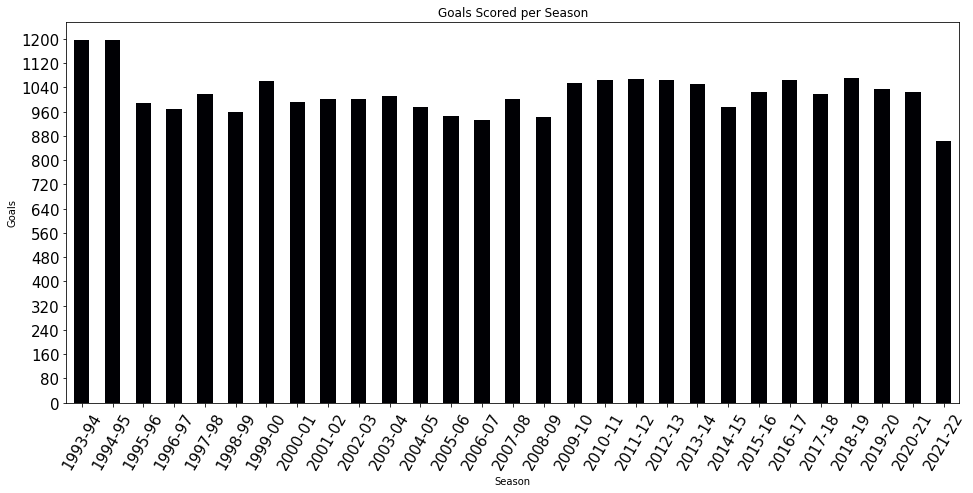

In [16]:
# Creating visualization for `Goals Scored per Season`
goal_per_season.plot(kind='bar',colormap='magma', fontsize=15,
                     figsize=(16,7),yticks=np.arange(0,1201,80)) 

plt.title("Goals Scored per Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.xticks(rotation=60)
plt.show()

#### Observation
The bar chart comfirms that the 1993-94 and 1994-95 seasons have the highest number of goals scored, all at 1195, this could be because of the high number of teams in those two seasons. 

#### Question 1.5 How many goals were scored by each team in each season?

In [17]:
# Defining Total Goals of Teams in all Seasons
total_goals = df.groupby('HomeTeam')['FTHG'].sum() + df.groupby('AwayTeam')['FTAG'].sum()
total_goals = total_goals.sort_values(ascending=False)
total_goals

HomeTeam
Man United          2110
Arsenal             1961
Liverpool           1944
Chelsea             1910
Tottenham           1672
Man City            1575
Everton             1428
Newcastle           1367
West Ham            1226
Aston Villa         1198
Southampton         1018
Blackburn            859
Leicester            803
Leeds                684
Fulham               631
Sunderland           612
Middlesbrough        594
Bolton               575
West Brom            510
Crystal Palace       492
Stoke                398
Sheffield Weds       354
Norwich              350
Charlton             342
Coventry             335
Wimbledon            328
Wolves               323
Wigan                316
Swansea              306
Watford              305
Portsmouth           292
Burnley              291
QPR                  276
Birmingham           273
Derby                271
Bournemouth          241
Nott'm Forest        188
Hull                 181
Brighton             176
Ipswich         

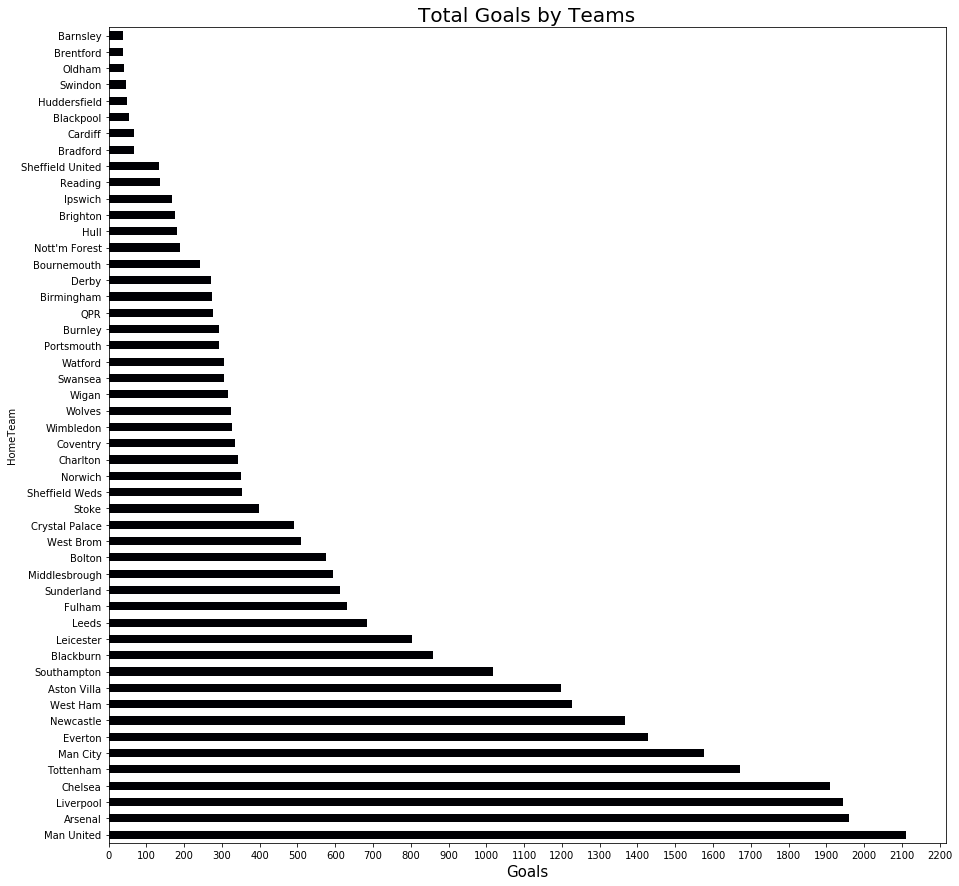

In [18]:
# Creating visualization for `Total Goals by Teams`
total_goals.plot(kind='barh',figsize=(15,15),xticks=np.arange(0,2201,100),
                 colormap='magma',fontsize=10)
plt.xlabel("Goals",fontsize=15)
plt.title("Total Goals by Teams",fontsize=20);

#### Observation
The bar chart shows `Man United` has scored the most goals in all season, which is 2110. This could be because they played in all seasons. On the other hand, `Barnsley` has scored only 37 goals, probably because they only played in one season.

#### Question 1.6 Which season(s) has the highest goals per game and which one(s) has the least?

In [19]:
# Defining Goals per match
gaols_per_match = (round(df.groupby('Season')['TotalGoals'].sum()/
                         df.groupby('Season')['Season'].count(),2))
gaols_per_match

Season
1993-94    2.59
1994-95    2.59
1995-96    2.60
1996-97    2.55
1997-98    2.68
1998-99    2.52
1999-00    2.79
2000-01    2.61
2001-02    2.63
2002-03    2.63
2003-04    2.66
2004-05    2.57
2005-06    2.48
2006-07    2.45
2007-08    2.64
2008-09    2.48
2009-10    2.77
2010-11    2.80
2011-12    2.81
2012-13    2.80
2013-14    2.77
2014-15    2.57
2015-16    2.70
2016-17    2.80
2017-18    2.68
2018-19    2.82
2019-20    2.72
2020-21    2.69
2021-22    2.79
dtype: float64

#### Visualization

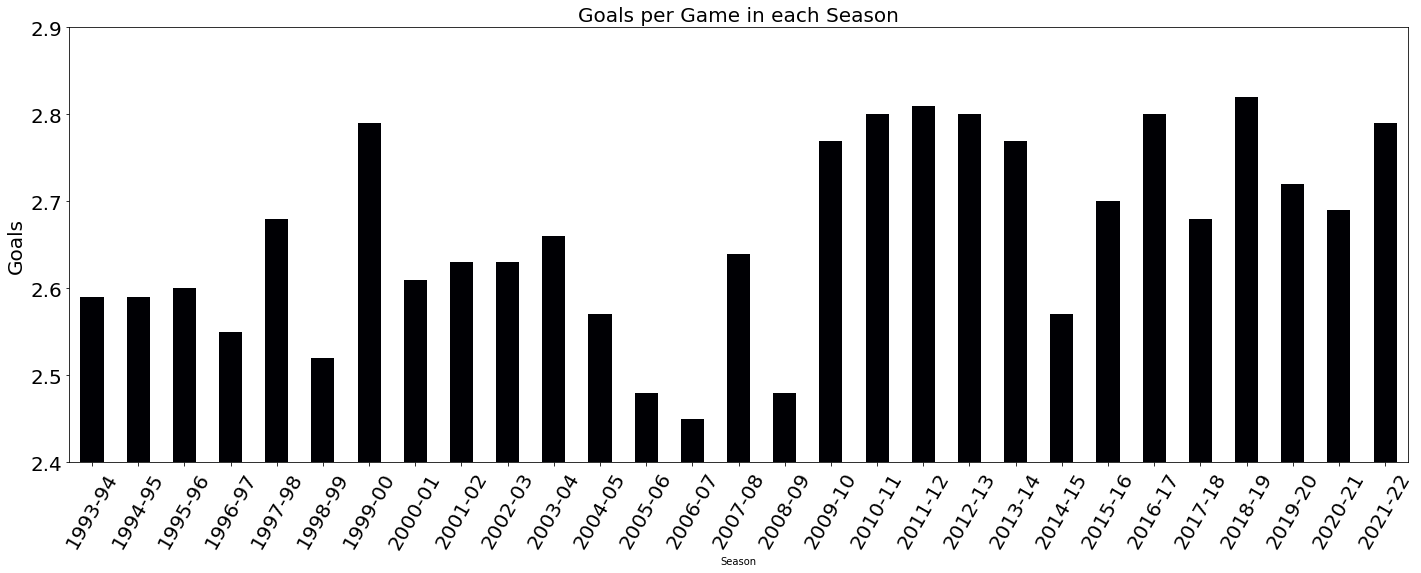

In [20]:
# Creating visualization for `Goals per Game`
gaols_per_match.plot(kind='bar',width=0.5,figsize=(24,8), colormap='magma', fontsize=20)

plt.ylim(2.4,2.9)  ##Setting a limit on the y-axis from the min value of gaols_per_match 
plt.ylabel('Goals',fontsize=20)
plt.title("Goals per Game in each Season",fontsize=20)
plt.xticks(rotation=60);

#### Observation
The bar chart shows that the 2018-19 season has the highest number of goals scored per games while 2006-07 has the least goals per game.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> It is interesting to have identified the goal trends in each season. 
> TotalGoals columns has been added to aid the identification of the goal trends.

<a id='bi'></a>
## Bivariate Exploration

> In this section, investigations into Home and Away goals as well as whether more corners or shots result in goals would be made

#### Question 2.1 What is the relationship between Home goals and Away goals over the Seasons?

In [21]:
# Defining Home VS Away goals
home_vs_away_goals = df.groupby('Season')[['FTHG','FTAG']].sum()
home_vs_away_goals

,FTHG,FTAG
Season,,
1993-94,663,532
1994-95,697,498
1995-96,580,408
1996-97,559,411
1997-98,592,427
1998-99,553,406
1999-00,635,425
2000-01,587,405
2001-02,557,444


#### Visualization

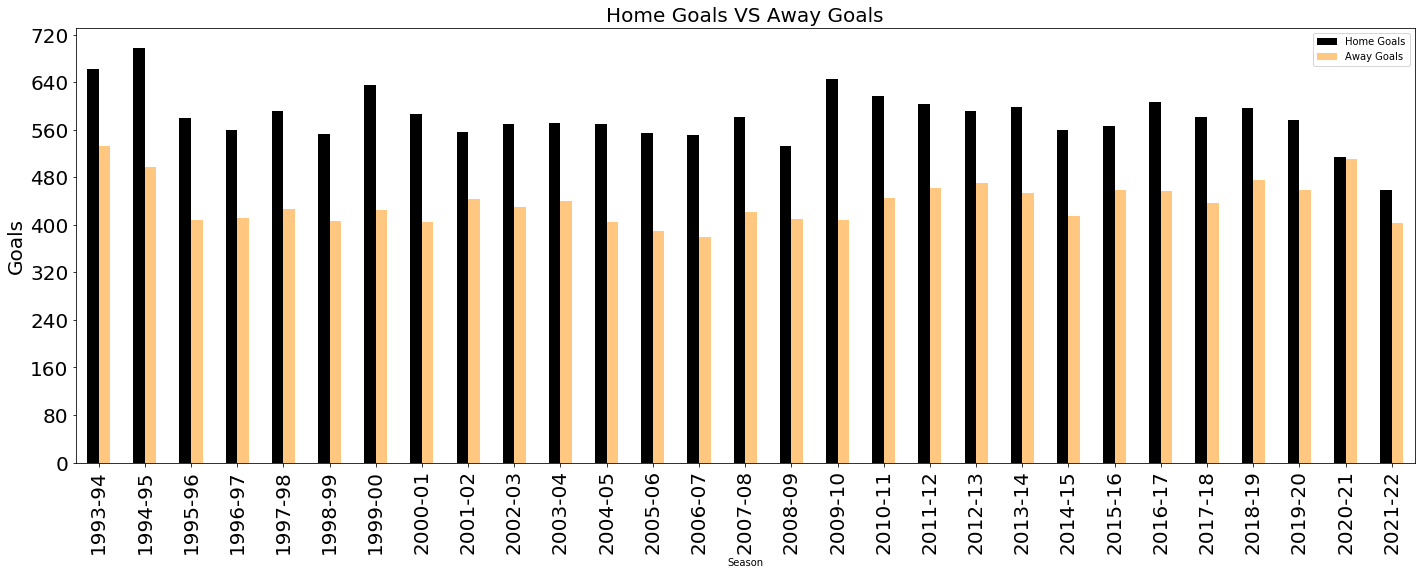

In [22]:
# Creating visualization for Home Goals VS Away Goals
home_vs_away_goals.plot(kind='bar', figsize=(24,8),yticks=np.arange(0,721,80), 
                       colormap='copper', fontsize=20)
plt.ylabel('Goals', fontsize=20)
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals VS Away Goals",fontsize=20)
plt.xticks(rotation=90);

#### Observation
The bar chart shows that there is usually a large differences in number of Home and Away goals in all the seasons, even 2020-21 season having the least difference, comes with 4 goal differences in Home goals against Away goals.

<div class="alert alert-block alert-info">
    <b>For the remaining exploration, a few data wrangling would have to be made on the dataset</b>
    <ol>
        <li><b>Dropping of NaN values as well as columns that would not be needed</b>: This is needed because the remaining <b>Exploratory Analysis</b> cannot be performed on NaN values and the 'DateTime', 'Referee', 'AF', 'HY', 'AY', 'HR', and 'AR' columns would not be needed in the analyses that follow </li>
        <li>Creating of <b>TotalCorners</b> and <b>TotalShotTarget</b> columns: These columns would be needed for further <b>Exploratory Analysis</b></li>
    </ol>
</div>

#### Dropping NaN values from the dataset
Before the dropping, a copy of the dataset need to be made

In [23]:
# Making copy of dataset
epl_df = df.copy()

epl_df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,TotalGoals
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [24]:
# Dropping NaN values
epl_df = epl_df.dropna()
epl_df = epl_df.reset_index(drop = True)
epl_df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,TotalGoals
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,4
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,6
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,4
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,4
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,2


In [25]:
# Dropping columns that are not needed
epl_df.drop(['DateTime', 'Referee', 'HF','AF', 'HY', 'AY', 'HR', 'AR'], axis=1, inplace=True)

# Checking whether columns are dropped
epl_df.columns

Index(['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'TotalGoals'],
      dtype='object')

In [26]:
# Creating `TotalCorners` and `TotalShotTarget` columns
epl_df['TotalCorners'] = epl_df['HC'] + epl_df['AC']
epl_df['TotalShotTarget'] = epl_df['HST'] + epl_df['AST']
epl_df.head()

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,TotalGoals,TotalCorners,TotalShotTarget
0,2000-01,Charlton,Man City,4,0,H,2.0,0.0,H,17.0,8.0,14.0,4.0,6.0,6.0,4,12.0,18.0
1,2000-01,Chelsea,West Ham,4,2,H,1.0,0.0,H,17.0,12.0,10.0,5.0,7.0,7.0,6,14.0,15.0
2,2000-01,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,6.0,16.0,3.0,9.0,8.0,4.0,4,12.0,12.0
3,2000-01,Derby,Southampton,2,2,D,1.0,2.0,A,6.0,13.0,4.0,6.0,5.0,8.0,4,13.0,10.0
4,2000-01,Leeds,Everton,2,0,H,2.0,0.0,H,17.0,12.0,8.0,6.0,6.0,4.0,2,10.0,14.0


#### Question 2.2 Do corners usually result in goals?

#### Visualization

In [27]:
# Defining a 'plot_reg' function.
def plot_reg(x, y, data, title = " ", xlabel = " ", ylabel = " "):
    sb.set(rc={'figure.figsize':(25, 10)})
    plot = sb.regplot(data=data, x=x, y=y, scatter=False)
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)
    
    
    
    return plt.show()

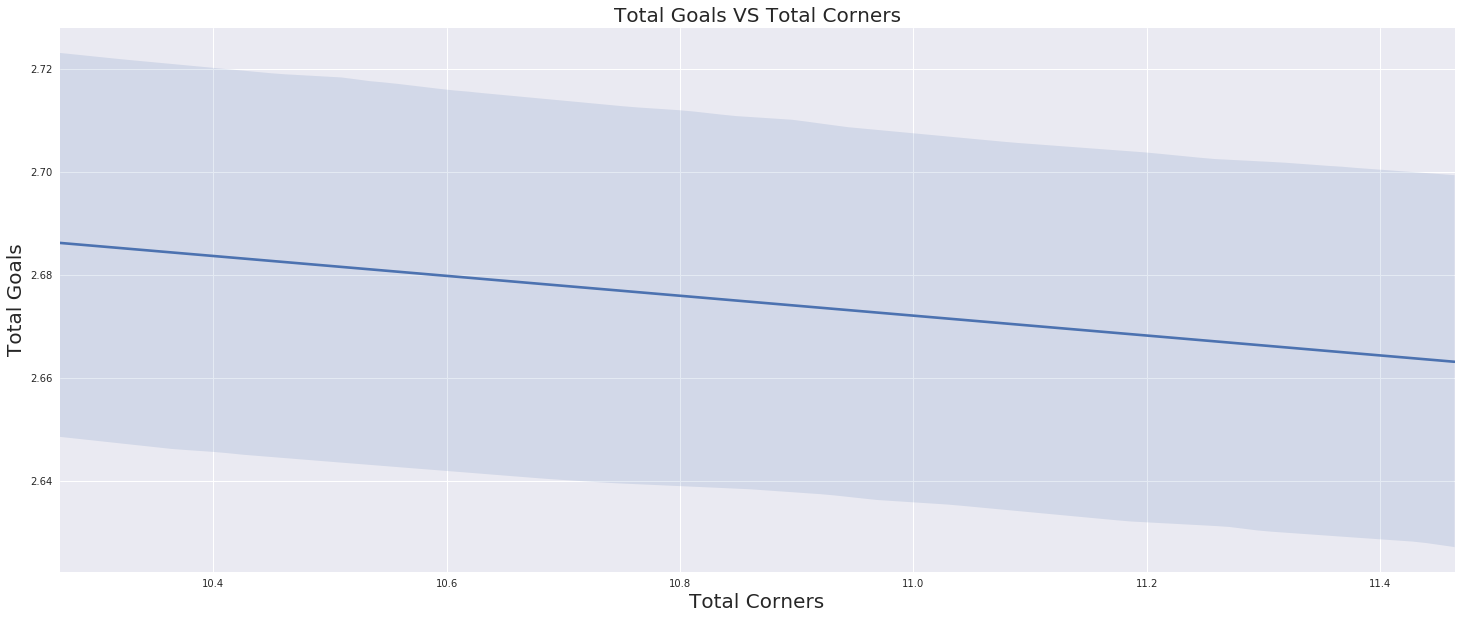

In [35]:
# Visualizing the relationship between Total Goals and Total Corners
plot_reg("TotalCorners", "TotalGoals", epl_df, "Total Goals VS Total Corners", "Total Corners", "Total Goals" )

#### Observation
The plot above shows a negative correlation between `Total Corners` and `Total Goals`. This shows that it corners do not usually result to goals.

***Yet, this could be further investigated into Home teams and Away teams basis as consideration into whether Home or Away teams convert their corners into goals***


#### Visualization

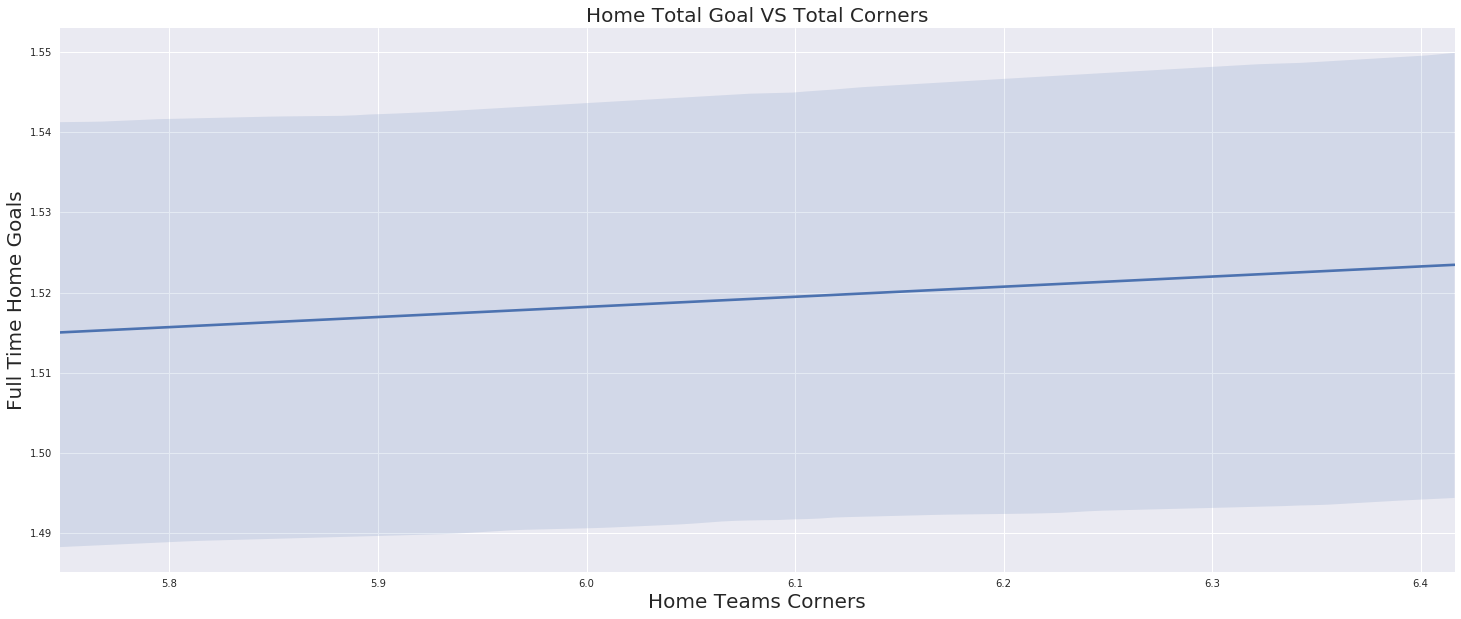

In [37]:
# Visualizing the relationship between Home teams goals and corners
plot_reg("HC", "FTHG", epl_df, "Home Total Goal VS Total Corners", "Home Teams Corners", "Full Time Home Goals" )

#### Observation
The plot above shows that more Home teams corners resulted in more goals, even though the correlation is very little.

***A consideration on Away teams can also be done***


#### Visualization

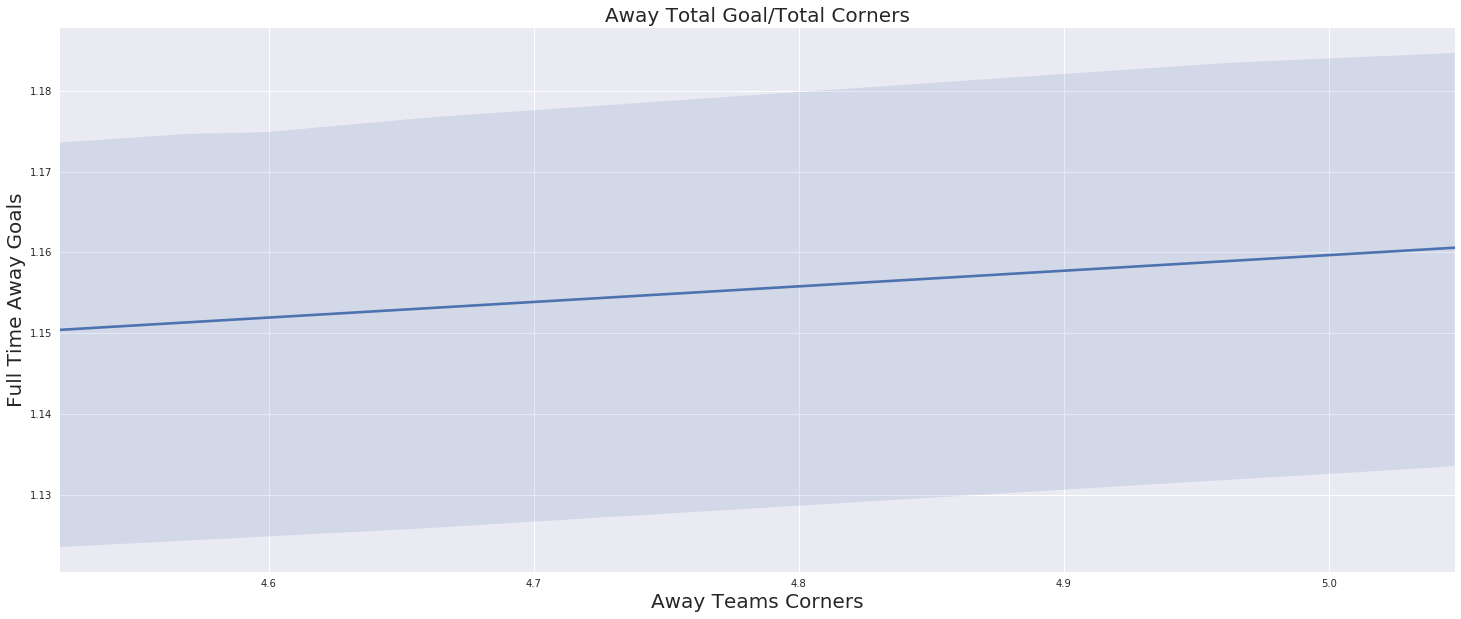

In [38]:
# Visualizing the relationship between Home teams goals and corners
plot_reg("AC", "FTAG", epl_df, "Away Total Goal/Total Corners", "Away Teams Corners", "Full Time Away Goals" )

#### Observation
The plot above shows that more Away teams corners resulted in more goals, even though the correlation is very little.

***It could therefore be concluded that there is very little correlation between both Home and Away corners and the total goals scored. Individually, teams with more corners tend to have more goals, even if games with more total corners don't.***

#### Question 2.3 Do corners usually result in shots on target?

#### Visualization

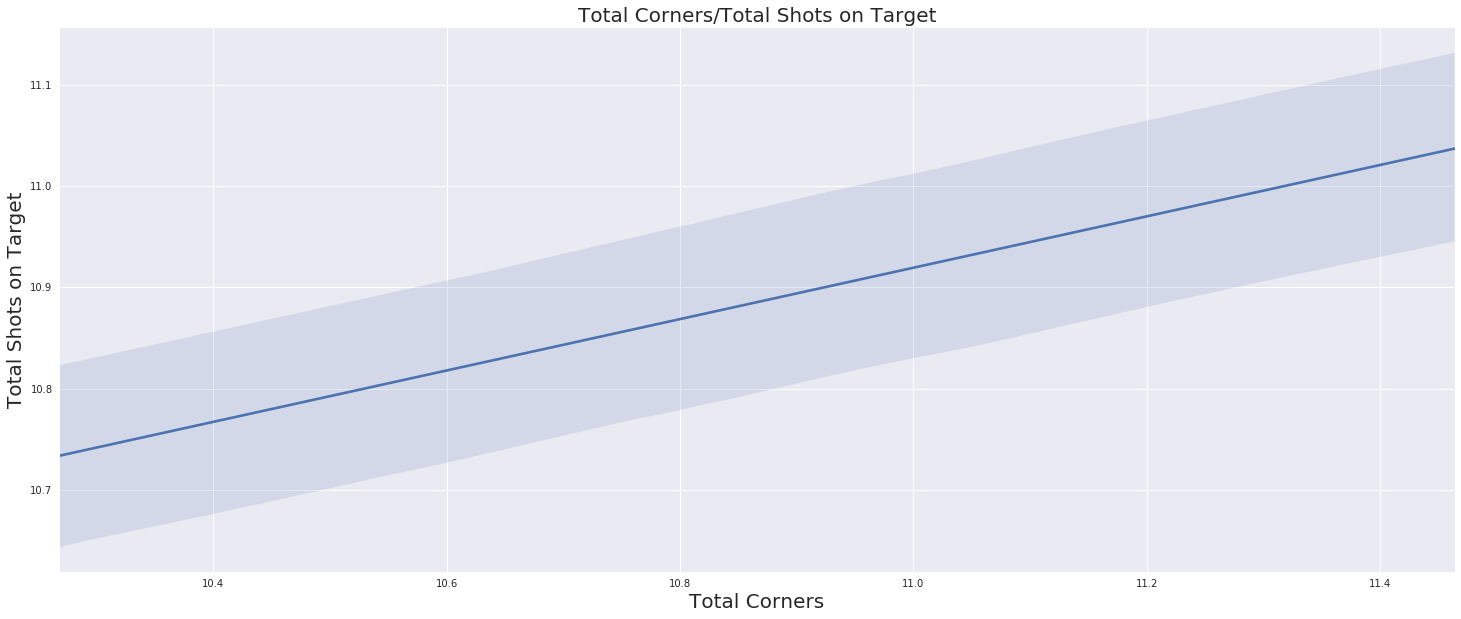

In [39]:
# Visualizing the relationship between `TotalCorners` and `TotalShotTarget`
plot_reg("TotalCorners", "TotalShotTarget", epl_df, "Total Corners/Total Shots on Target", 
         "Total Corners", "Total Shots on Target" )

#### Observation
The plot above shows a direct relationship between corners and shots.

***A consideration on individual Home and Away teams can also be done***

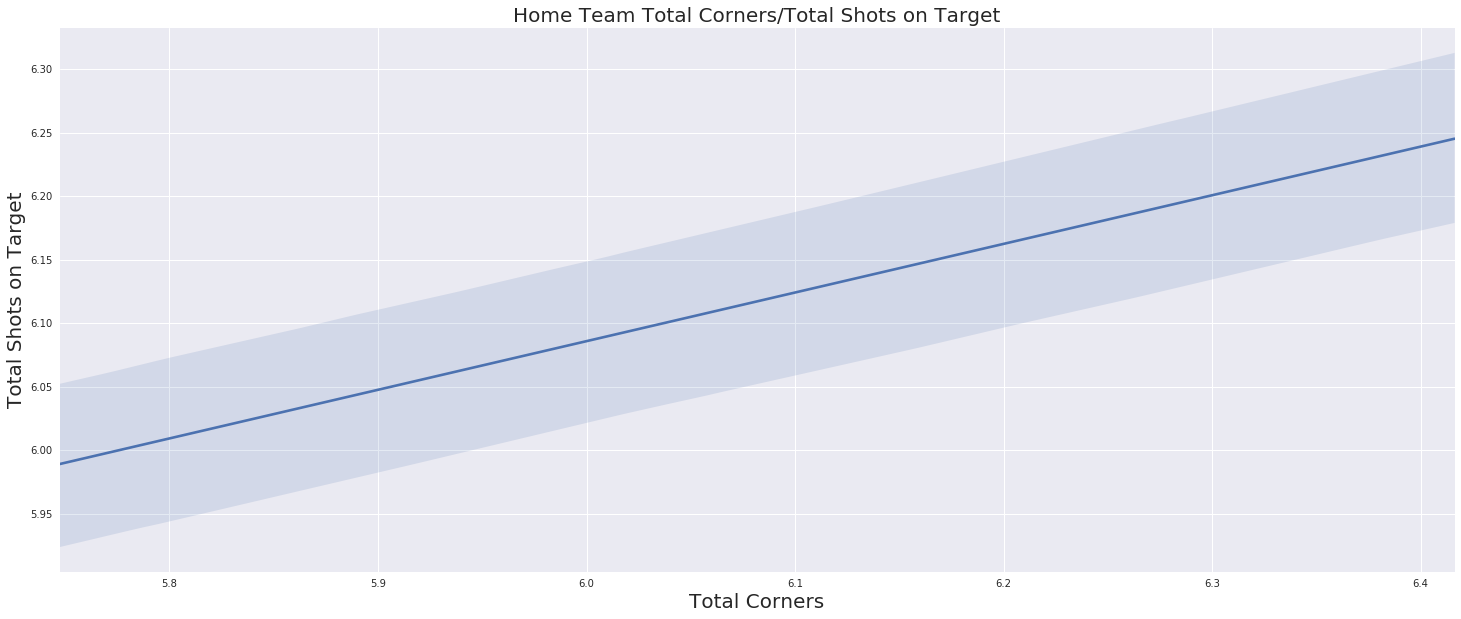

In [40]:
# Home teams analysis on relationship between corners and shot on target
plot_reg("HC", "HST", epl_df, "Home Team Total Corners/Total Shots on Target", "Total Corners", "Total Shots on Target" )

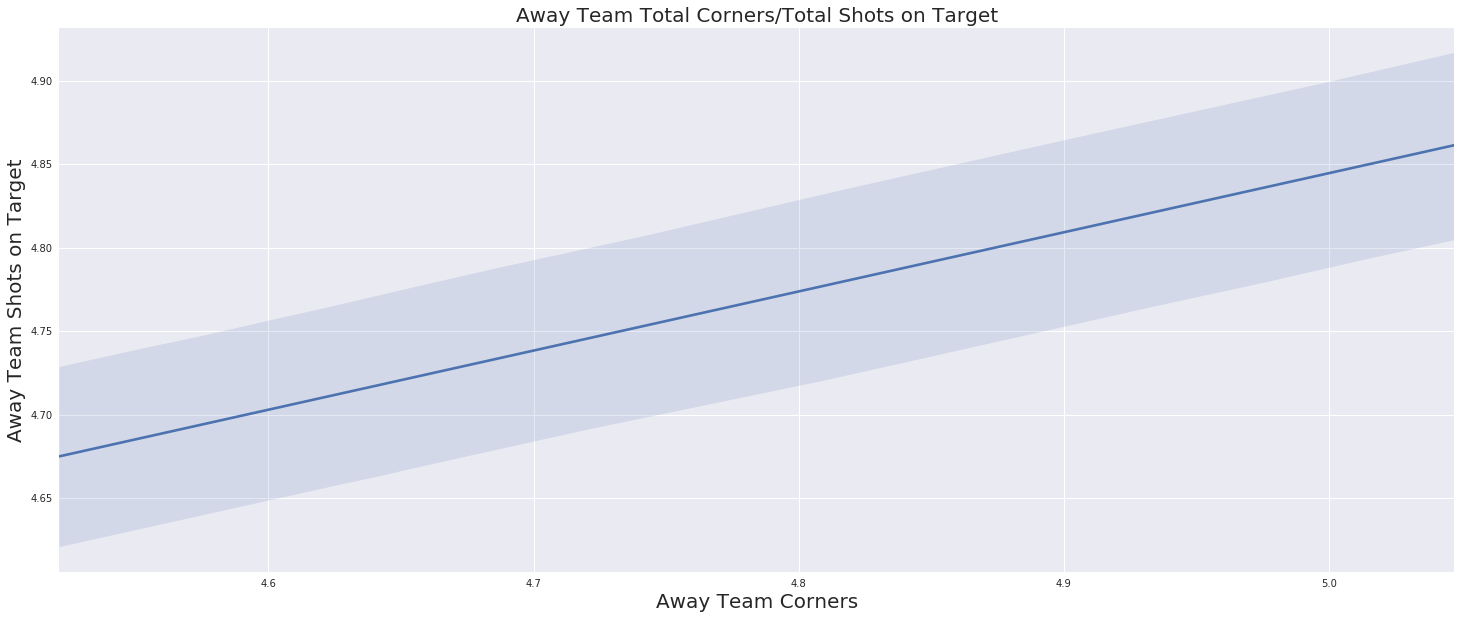

In [41]:
# Away teams analysis on relationship between corners and shot on target
plot_reg("AC", "AST", epl_df, "Away Team Total Corners/Total Shots on Target", 
         "Away Team Corners", "Away Team Shots on Target" )

#### Observation
Corners have a strong direct relationship with shots taken, both in total for the game and for each team.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Corners have a strong direct relationship with shots taken, both in total for the game and for each team. They have a clear relationship with goals as well, when looking at specific teams, but not at the overall game. There isn't a strong relationship between final results and corners, however.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There could be a strong relationship between `Shots` and `Shots on Target`.

<a id='multi'></a>
## Multivariate Exploration

> In this section, investigations into the correlation among Total Goals, Total Corners and Total Shots on Target would be done.

#### Question 3.1 How are Tota lGoals, Total Corners and Total Shots on Target correlated?

#### Visualization

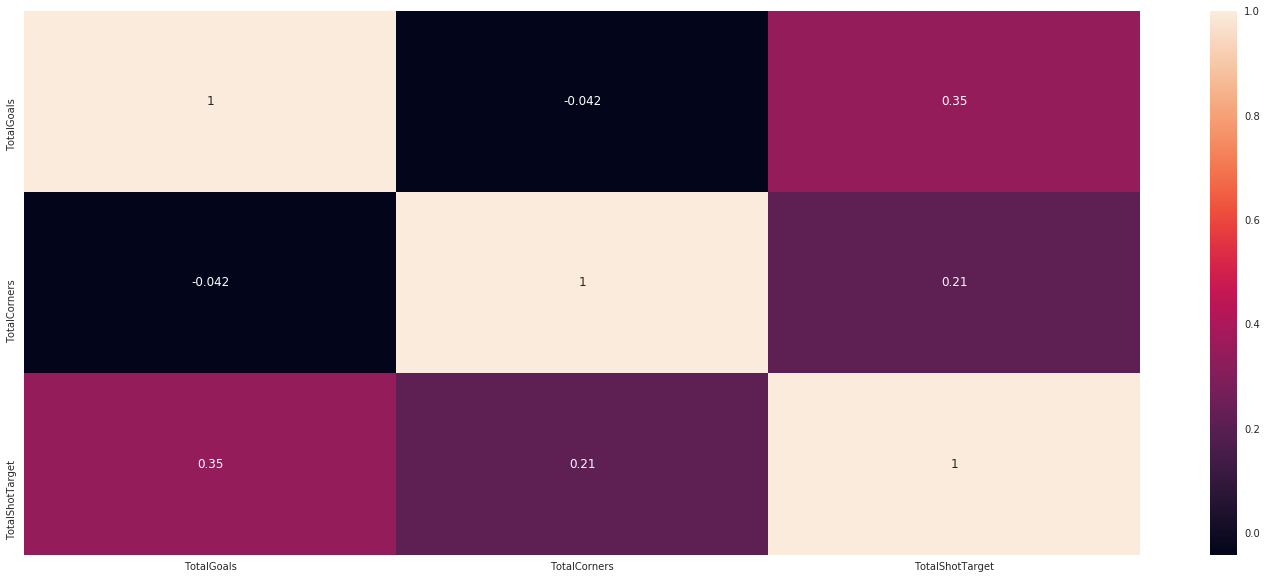

In [42]:
# Visualizing the relationship among `TotalGoals`, `TotalCorners` and `TotalShotTarget`
f = (
    epl_df.loc[:, ['TotalGoals', 'TotalCorners', 'TotalShotTarget']]
).corr()

sb.heatmap(f, annot=True)
sb.set(font_scale=2.0)
plt.show()

#### Observation
The heatmap comfirms that there is indeed a negative correlation between `Total Goals Scored` and `Total Corner`, while there is a positive, yet not a steady correlation between `Total Shots on Target` and `Total Goals` as well as `Total Shots on Target` and `Total Corners`.

***This deduction can be further investigated to consider these relationships over all the `Season`***

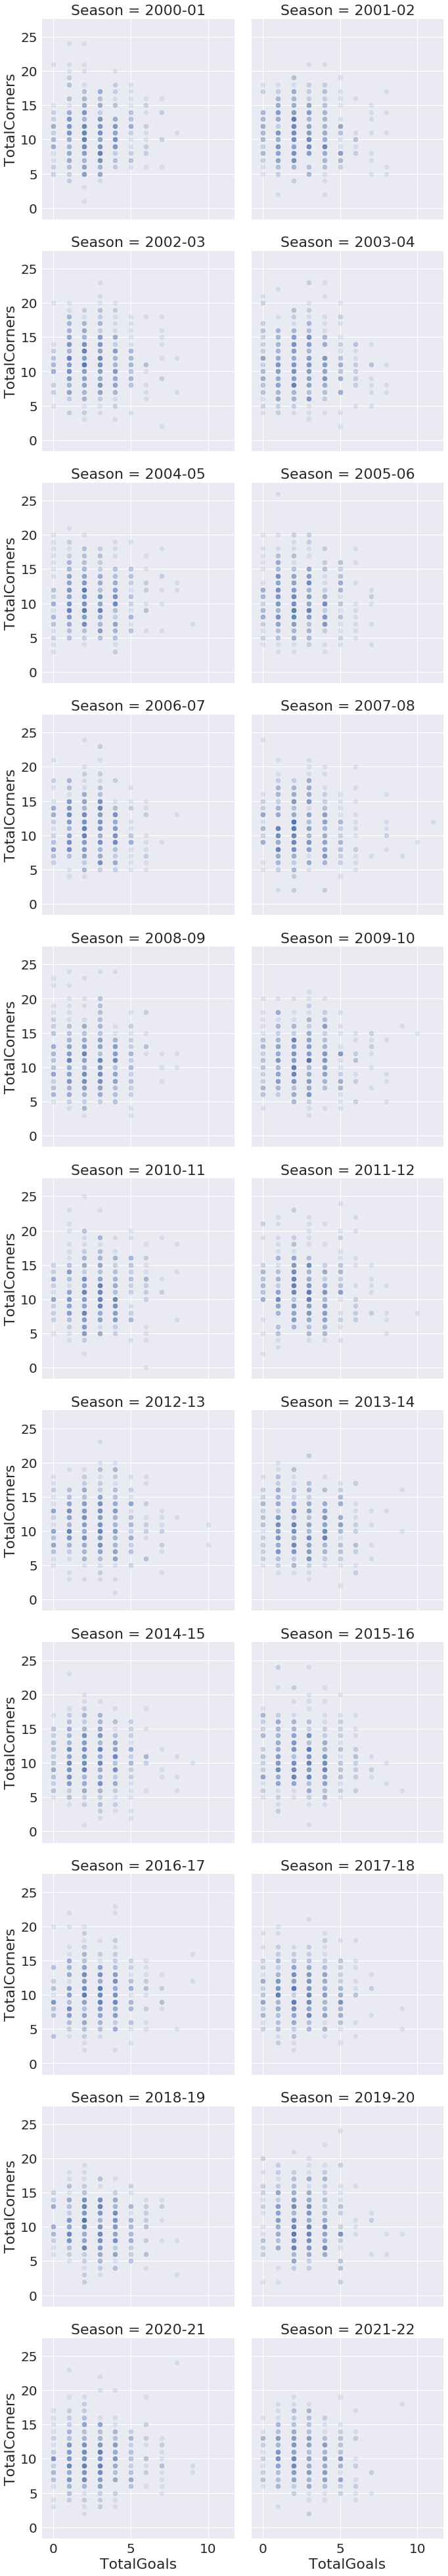

In [53]:
# Visualizing the relationship between `TotalGoals`, and `TotalCorners` over the `Seasons`
g = sb.FacetGrid(data = epl_df, col = 'Season', size = 5, col_wrap = 2)
g.map(plt.scatter, 'TotalGoals','TotalCorners', alpha = 1/8);

#### Observation
The grid plot comfirms that there is indeed a negative correlation between `Total Goals Scored` and `Total Corner`even over the `Season`.

***Another consideration that can be done to confirm this is to look at the relationship between `Total Shots on Target` against `Total Goals` over the `Seasons`.***

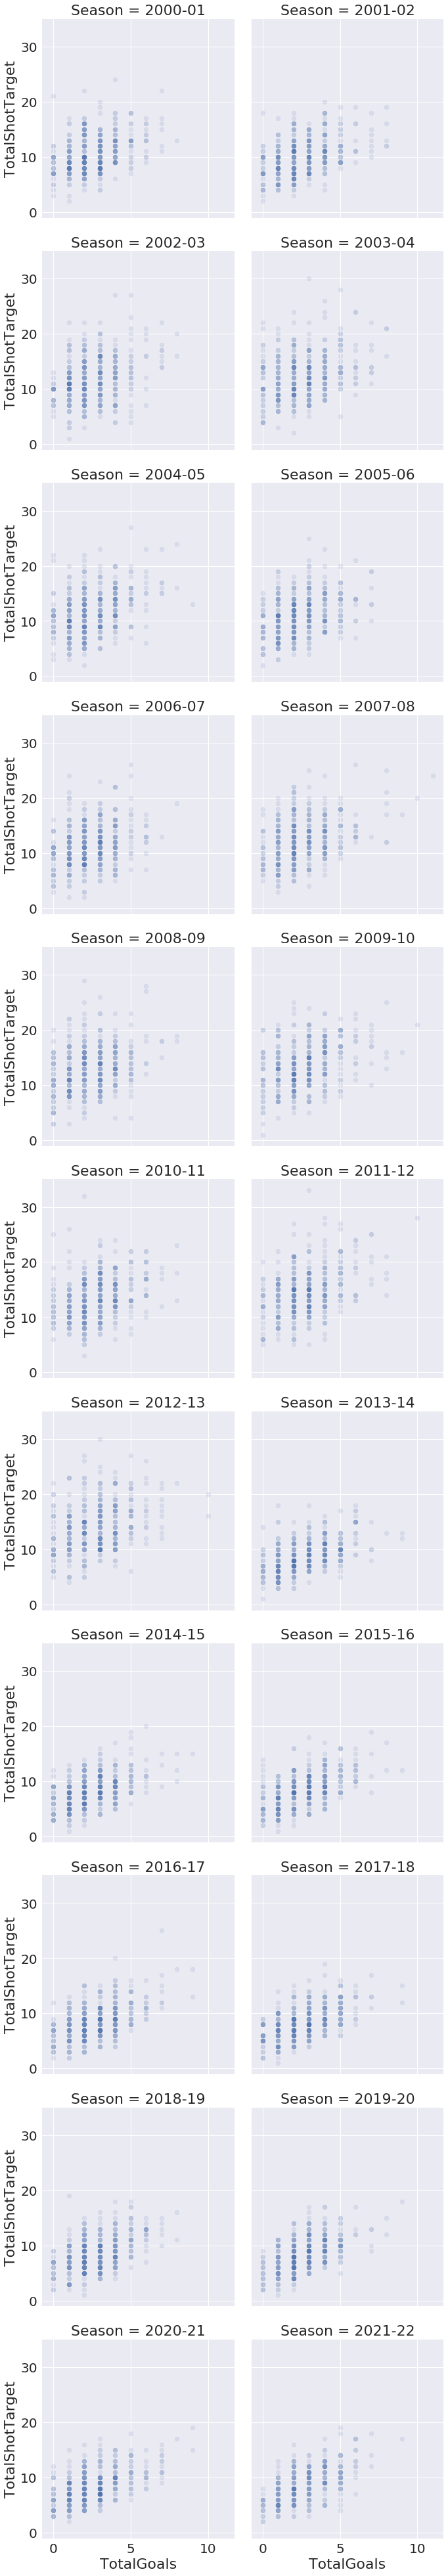

In [52]:
g = sb.FacetGrid(data = epl_df, col = 'Season', size = 5, col_wrap = 2)
g.map(plt.scatter, 'TotalGoals','TotalShotTarget', alpha = 1/8);

#### Observation
The grid plot comfirms that there is indeed a positive correlation between `Total Goals Scored` and `Total Shots on Target` over the `Seasons`.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Over each season, more corners are not usually converted to goals while shorts on target can usually result to goals. 

### Were there any interesting or surprising interactions between features?

> It was surprsing to find out that corners do not seem to have a positive correlation on total goals.

<a id='con'></a>
## Conclusions

<ul>
        <li>First 2 seasons of Premier League had 22 teams which was reduced to 20 teams from the 1995-96 season. </li>
        <li>Arsenal, Chelsea, Man United and Tottenham are the teams that have played in all the 29 seasons. On the other hand, Barnsley, Blackpool, Brentford, Oldham and Swindon played in only one season.</li>
        <li>2009-10 season has the highest Home/Away goal ratio while 2020-21 has the least Home/Away goal ratio.</li>
        <li>The 1993-94 and 1994-95 seasons have the highest number of goals scored, all at 1195, this could be because of the high number of teams in those two seasons. </li>
        <li>Man United has scored the most goals in all season, which is 2110. This could be because they played in all seasons. On the other hand, Barnsley has scored only 37 goals, probably because they only played in one season.</li>
        <li>2018-19 season has the highest number of goals scored per games while 2006-07 has the least goals per game.</li>
        <li>All seasons have more Home Goals than Away goals hinting towards possible Home Ground Advantage for goal scoring.</li>
        <li>There is a negative correlation between Total Corners and Total Goals. This shows that corners do not usually result to goals.</li>
        <li>Individually, teams with more corners tend to have more goals, even if games with more total corners don't.</li>
        <li>Corners have a strong direct relationship with shots taken, both in total for the game and for each team (Home or Away).</li>
        <li>There is indeed a negative correlation between Total Goals Scored and Total Corner, while there is a positive, yet not a steady correlation between Total Shots on Target and Total Goals as well as Total Shots on Target and Total Corners.</li>
        <li>Over each season, more corners are not usually converted to goals while shorts on target can usually result to goals.</li>
      
</ul>
